In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from varname import nameof
import matplotlib.pyplot as plt
import src.utils.index as utils
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [2]:
# MODELS
MODELS = {
    "Logistic Regression": LogisticRegression,
    "K Nearest Neighbors": KNeighborsClassifier,
    "Decision Tree Classifier": DecisionTreeClassifier,
    "Random Forest Classifier": RandomForestClassifier
    }

In [3]:
df = pd.read_csv("./src/data/diabetes_binary_health_indicators_BRFSS2015.csv")

In [4]:
display(f"Shape of the dataset (m=rows x n=columns): {df.shape}")
display("Data frame preview, first 20 rows: ")
df.head(20).T

'Shape of the dataset (m=rows x n=columns): (253680, 22)'

'Data frame preview, first 20 rows: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Diabetes_binary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
HighBP,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
HighChol,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
CholCheck,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0,25.0,30.0,25.0,30.0,24.0,25.0,34.0,26.0,28.0,33.0,33.0,21.0,23.0,23.0,28.0
Smoker,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
Fruits,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
columns = df.columns
columns_lst = columns.tolist() 
pprint(columns_lst)

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']


In [6]:
for col in df.columns:
    if len(df[col].unique()) == 2:
        df[col] = df[col].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  int32  
 1   HighBP                253680 non-null  int32  
 2   HighChol              253680 non-null  int32  
 3   CholCheck             253680 non-null  int32  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int32  
 6   Stroke                253680 non-null  int32  
 7   HeartDiseaseorAttack  253680 non-null  int32  
 8   PhysActivity          253680 non-null  int32  
 9   Fruits                253680 non-null  int32  
 10  Veggies               253680 non-null  int32  
 11  HvyAlcoholConsump     253680 non-null  int32  
 12  AnyHealthcare         253680 non-null  int32  
 13  NoDocbcCost           253680 non-null  int32  
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
utils.unique_values_per_column(df)

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [9]:
duplicates_arr, duplicates_len = utils.duplicate_obs(df)
display(f"Number of duplicated rows: {duplicates_len}")

'Number of duplicated rows: 24206'

In [10]:
initial_obs = df.shape[0]
df.drop_duplicates(inplace=True)
final_obs = df.shape[0]
if initial_obs - final_obs == duplicates_len:
    print(f"Correctly removed duplicated obs totaling {duplicates_len}")

Correctly removed duplicated obs totaling 24206


In [11]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

array([[<AxesSubplot: title={'center': 'Diabetes_binary'}>,
        <AxesSubplot: title={'center': 'HighBP'}>,
        <AxesSubplot: title={'center': 'HighChol'}>,
        <AxesSubplot: title={'center': 'CholCheck'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'Smoker'}>,
        <AxesSubplot: title={'center': 'Stroke'}>,
        <AxesSubplot: title={'center': 'HeartDiseaseorAttack'}>,
        <AxesSubplot: title={'center': 'PhysActivity'}>,
        <AxesSubplot: title={'center': 'Fruits'}>],
       [<AxesSubplot: title={'center': 'Veggies'}>,
        <AxesSubplot: title={'center': 'HvyAlcoholConsump'}>,
        <AxesSubplot: title={'center': 'AnyHealthcare'}>,
        <AxesSubplot: title={'center': 'NoDocbcCost'}>,
        <AxesSubplot: title={'center': 'GenHlth'}>],
       [<AxesSubplot: title={'center': 'MentHlth'}>,
        <AxesSubplot: title={'center': 'PhysHlth'}>,
        <AxesSubplot: title={'center': 'DiffWalk'}>,
        <AxesSubp

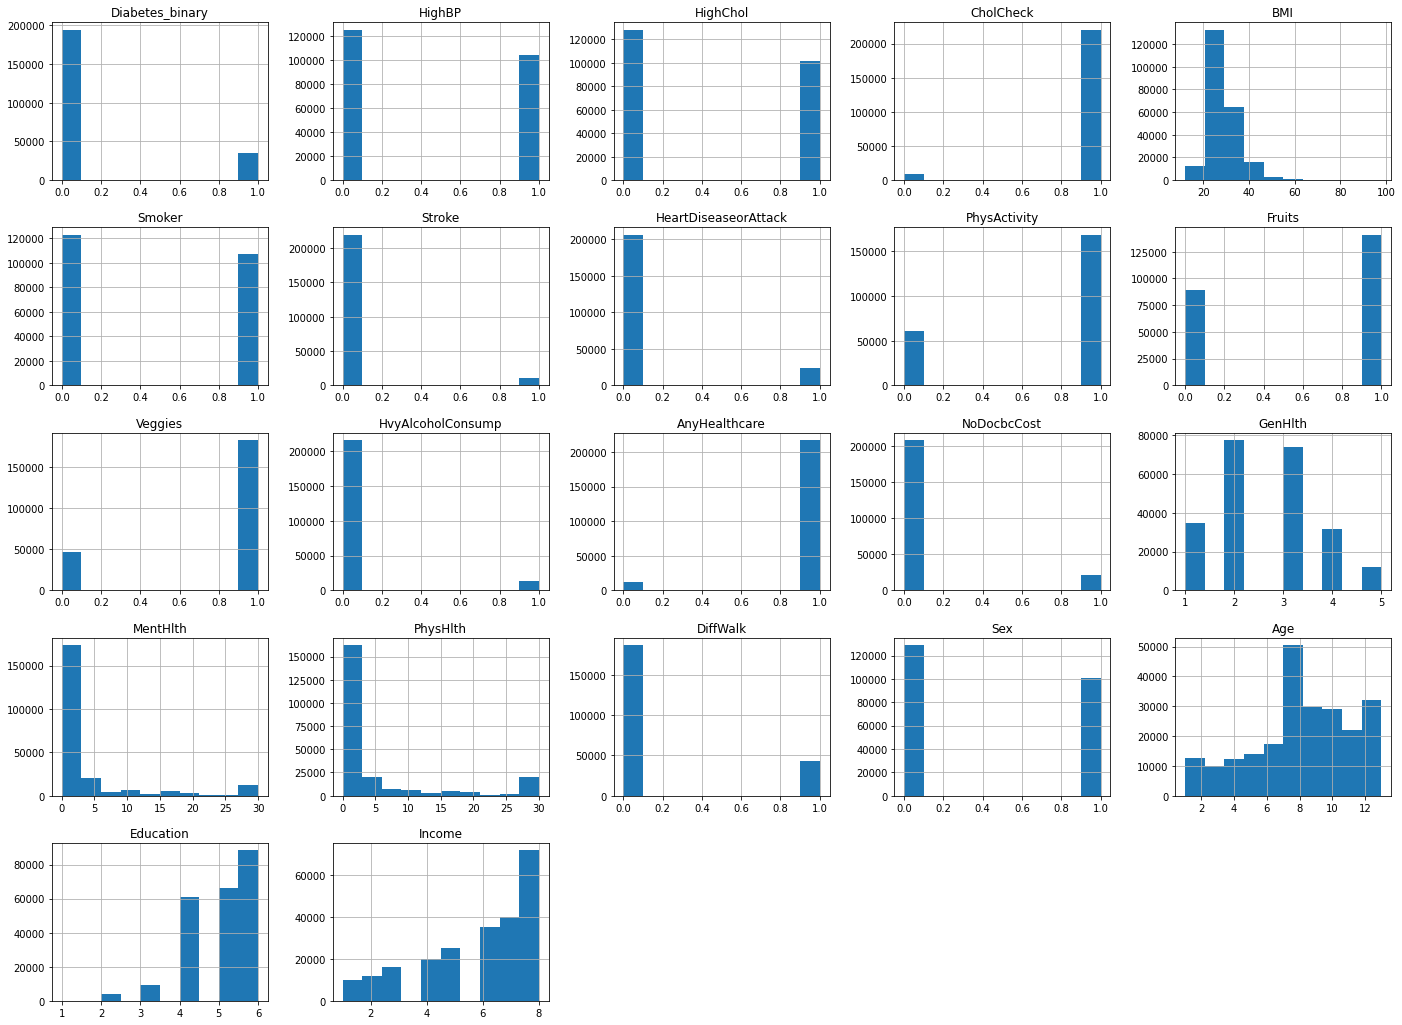

In [12]:
df.hist(figsize=(24,18))

<AxesSubplot: >

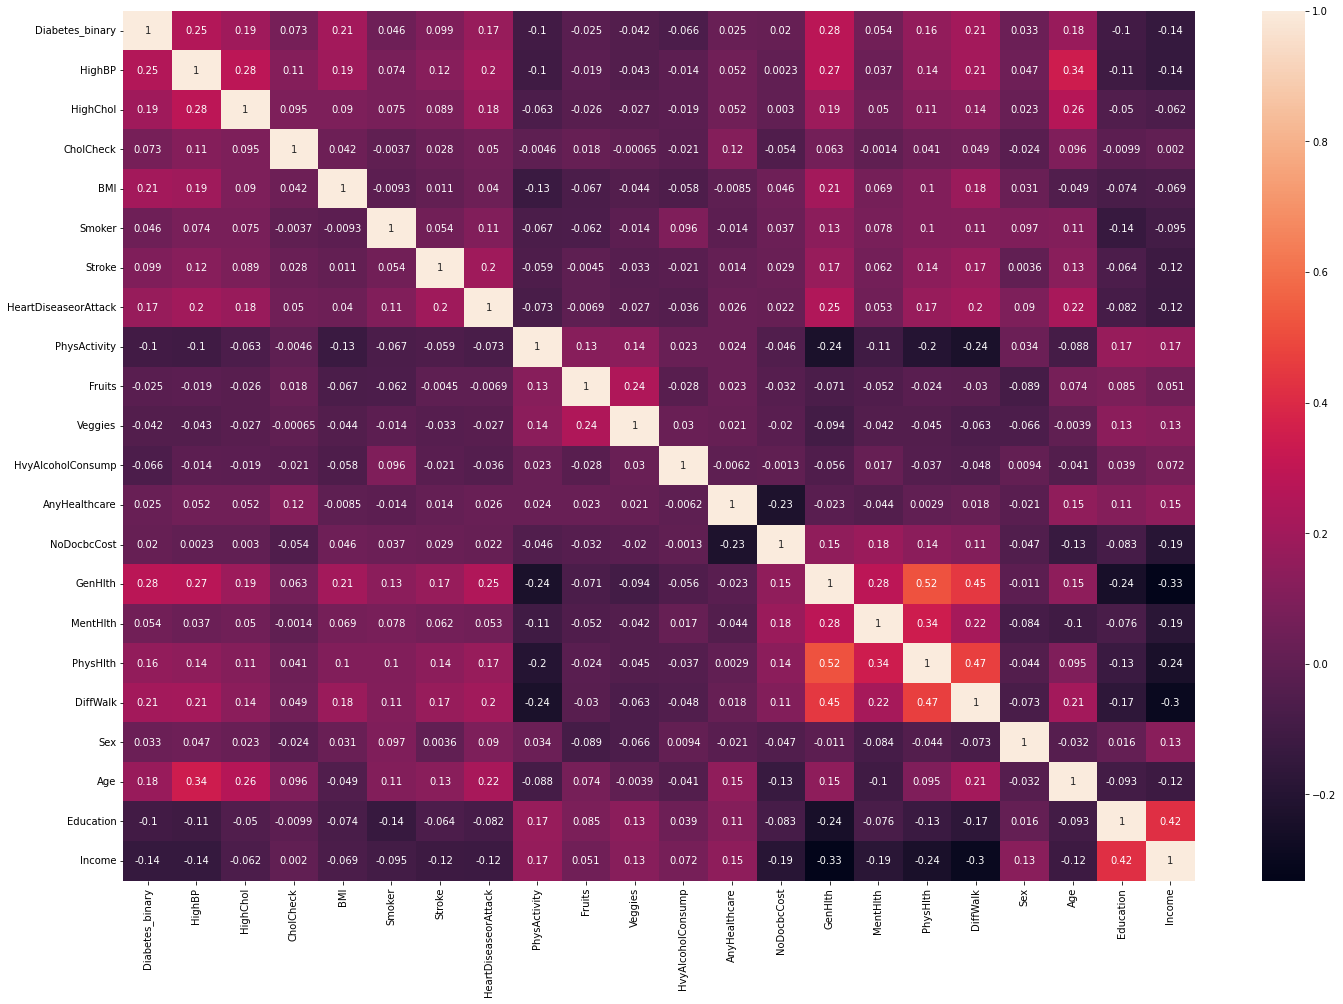

In [13]:
plt.figure(figsize=(24,16))
sns.heatmap(df.corr(), annot=True)

In [14]:
multicol_df = utils.report_multicoll(df)
multicol_df

,feat1,feat2,corr
0,Age,HighBP,0.339802
1,DiffWalk,PhysHlth,0.466852
2,DiffWalk,GenHlth,0.446696
3,Education,Income,0.419045
4,GenHlth,Income,-0.331782
5,GenHlth,PhysHlth,0.516476
6,MentHlth,PhysHlth,0.340191


In [15]:
col_to_drop = ["DiffWalk", "GenHlth"]
df = df.drop(["DiffWalk", "GenHlth"], axis=1)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,1,0,1,0,18.0,15.0,0,9.0,4.0,3.0
1,0,0,0,0,25.0,1,0,0,1,0,0,0,0,1,0.0,0.0,0,7.0,6.0,1.0
2,0,1,1,1,28.0,0,0,0,0,1,0,0,1,1,30.0,30.0,0,9.0,4.0,8.0
3,0,1,0,1,27.0,0,0,0,1,1,1,0,1,0,0.0,0.0,0,11.0,3.0,6.0
4,0,1,1,1,24.0,0,0,0,1,1,1,0,1,0,3.0,0.0,0,11.0,5.0,4.0


## SPLIT

In [16]:
X_train, X_test, y_train, y_test = utils.split_data(df, target="Diabetes_binary")


## BENCHMARK

In [17]:
benchmark_prediction_of_models = utils.get_predictions(MODELS, sets=[X_train, X_test, y_train, y_test])
benchmark_results = utils.get_results(benchmark_prediction_of_models, y_test)
benchmark_results

C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,r2,mean_abs,mean_sqrd
model,,,
Logistic Regression,-0.156439,0.152365,0.390339
K Nearest Neighbors,-0.300382,0.171329,0.413920
Decision Tree Classifier,-0.731550,0.228137,0.477637
Random Forest Classifier,-0.244287,0.163939,0.404893


In [18]:
for prediction in benchmark_prediction_of_models:
    print(prediction[0])
    print(classification_report(y_test, prediction[1]))
    print(confusion_matrix(y_test, prediction[1]))

Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     48412
           1       0.56      0.12      0.20      8957

    accuracy                           0.85     57369
   macro avg       0.71      0.55      0.56     57369
weighted avg       0.81      0.85      0.80     57369

[[47541   871]
 [ 7870  1087]]
K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     48412
           1       0.39      0.18      0.25      8957

    accuracy                           0.83     57369
   macro avg       0.63      0.56      0.57     57369
weighted avg       0.79      0.83      0.80     57369

[[45940  2472]
 [ 7357  1600]]
Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     48412
           1       0.28      0.30      0.29      8957

    accuracy                           0.77     57369
 

## SCALING

In [19]:
# because we have only integer (discrete and float), lets scale all float values
from sklearn.preprocessing import Normalizer
X_train_scaled, X_test_scaled = utils.scale_sets([X_train, X_test], scaler=Normalizer)

In [20]:
display(X_train_scaled.head(5))
display(X_test_scaled.head(5))

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,Sex,Age,Education,Income
220429,0.000000,0.000000,0.035556,0.853342,0.035556,0.0,0.000000,0.035556,0.035556,0.035556,0.0,0.035556,0.0,0.0,0.106668,0.000000,0.355559,0.213335,0.284447
17010,0.000000,0.027077,0.027077,0.947678,0.027077,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.027077,0.0,0.0,0.000000,0.027077,0.297842,0.081230,0.054153
84654,0.000000,0.000000,0.039746,0.914168,0.039746,0.0,0.000000,0.000000,0.039746,0.000000,0.0,0.039746,0.0,0.0,0.079493,0.000000,0.317971,0.158986,0.158986
180631,0.035829,0.035829,0.035829,0.824061,0.035829,0.0,0.035829,0.000000,0.035829,0.035829,0.0,0.035829,0.0,0.0,0.000000,0.035829,0.465773,0.214972,0.214972
58929,0.028653,0.028653,0.028653,0.916909,0.028653,0.0,0.028653,0.028653,0.028653,0.028653,0.0,0.028653,0.0,0.0,0.000000,0.000000,0.286534,0.171920,0.200574


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,Sex,Age,Education,Income
68194,0.038720,0.038720,0.000000,0.929284,0.038720,0.000000,0.000000,0.038720,0.000000,0.000000,0.0,0.038720,0.0,0.000000,0.077440,0.038720,0.154881,0.154881,0.271041
196212,0.027671,0.000000,0.027671,0.857808,0.027671,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.027671,0.0,0.415068,0.027671,0.027671,0.193699,0.110685,0.193699
75918,0.033408,0.033408,0.033408,0.902007,0.000000,0.000000,0.000000,0.000000,0.000000,0.033408,0.0,0.033408,0.0,0.000000,0.000000,0.033408,0.300669,0.133631,0.267261
191039,0.028831,0.028831,0.028831,0.922608,0.000000,0.000000,0.000000,0.000000,0.028831,0.028831,0.0,0.028831,0.0,0.000000,0.000000,0.000000,0.317146,0.115326,0.172989
72359,0.000000,0.030096,0.030096,0.902894,0.030096,0.030096,0.030096,0.030096,0.000000,0.030096,0.0,0.030096,0.0,0.000000,0.000000,0.030096,0.331061,0.150482,0.210675


In [21]:
from imblearn.combine import SMOTEENN
balancer = SMOTEENN()
X_train_scaled_balanced, y_train_balanced = balancer.fit_resample(X_train_scaled, y_train)

(215311, 19)

array([[<AxesSubplot: title={'center': 'HighBP'}>,
        <AxesSubplot: title={'center': 'HighChol'}>,
        <AxesSubplot: title={'center': 'CholCheck'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'Smoker'}>,
        <AxesSubplot: title={'center': 'Stroke'}>,
        <AxesSubplot: title={'center': 'HeartDiseaseorAttack'}>,
        <AxesSubplot: title={'center': 'PhysActivity'}>],
       [<AxesSubplot: title={'center': 'Fruits'}>,
        <AxesSubplot: title={'center': 'Veggies'}>,
        <AxesSubplot: title={'center': 'HvyAlcoholConsump'}>,
        <AxesSubplot: title={'center': 'AnyHealthcare'}>],
       [<AxesSubplot: title={'center': 'NoDocbcCost'}>,
        <AxesSubplot: title={'center': 'MentHlth'}>,
        <AxesSubplot: title={'center': 'PhysHlth'}>,
        <AxesSubplot: title={'center': 'Sex'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Education'}>,
        <AxesSubplot: title={'c

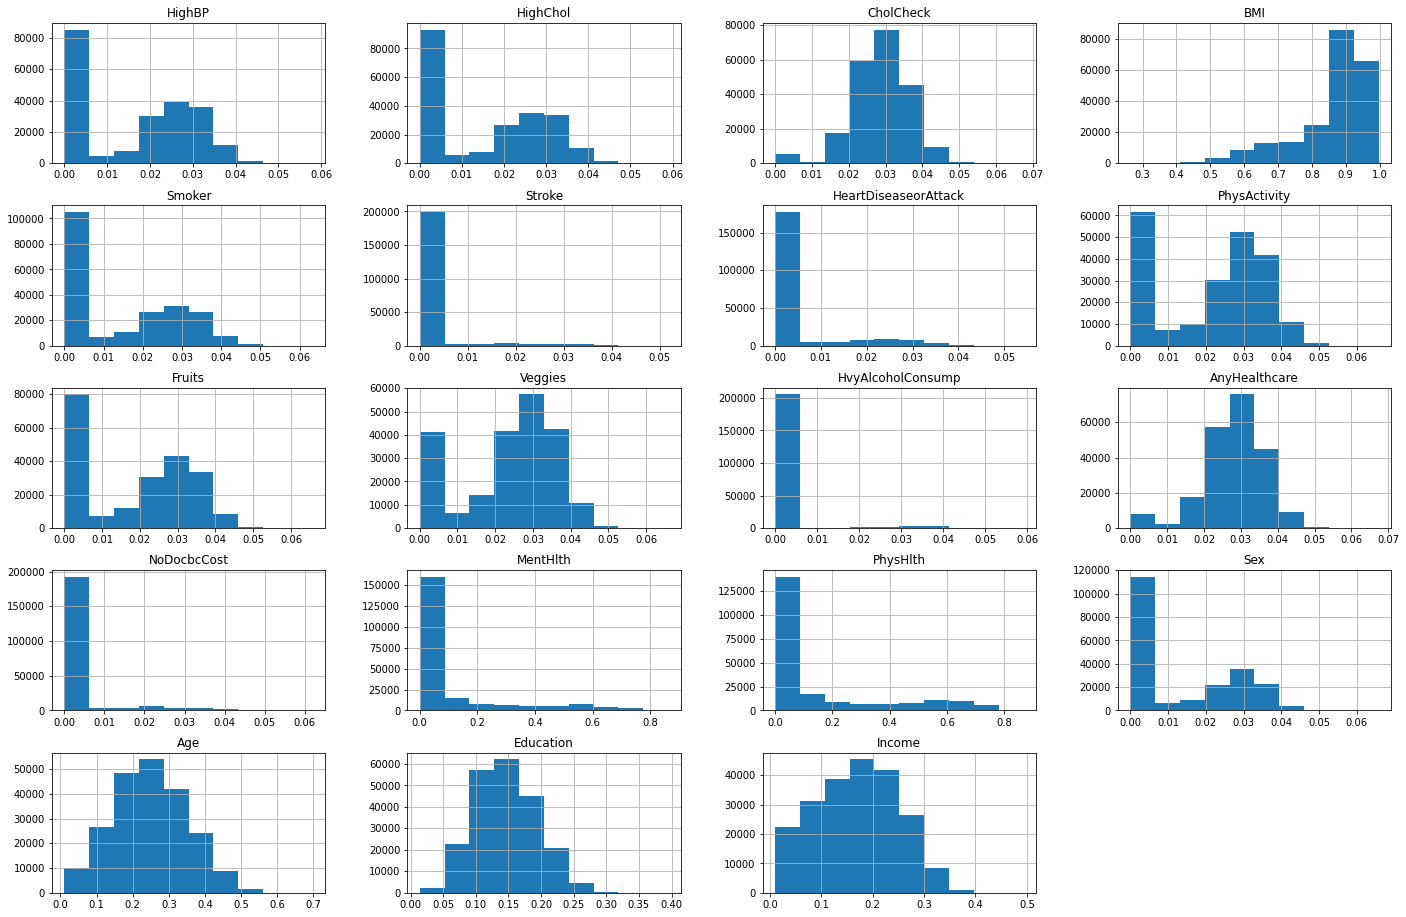

In [22]:
display(X_train_scaled_balanced.shape)
X_train_scaled_balanced.hist(figsize=(24, 16))

(215311,)

<AxesSubplot: >

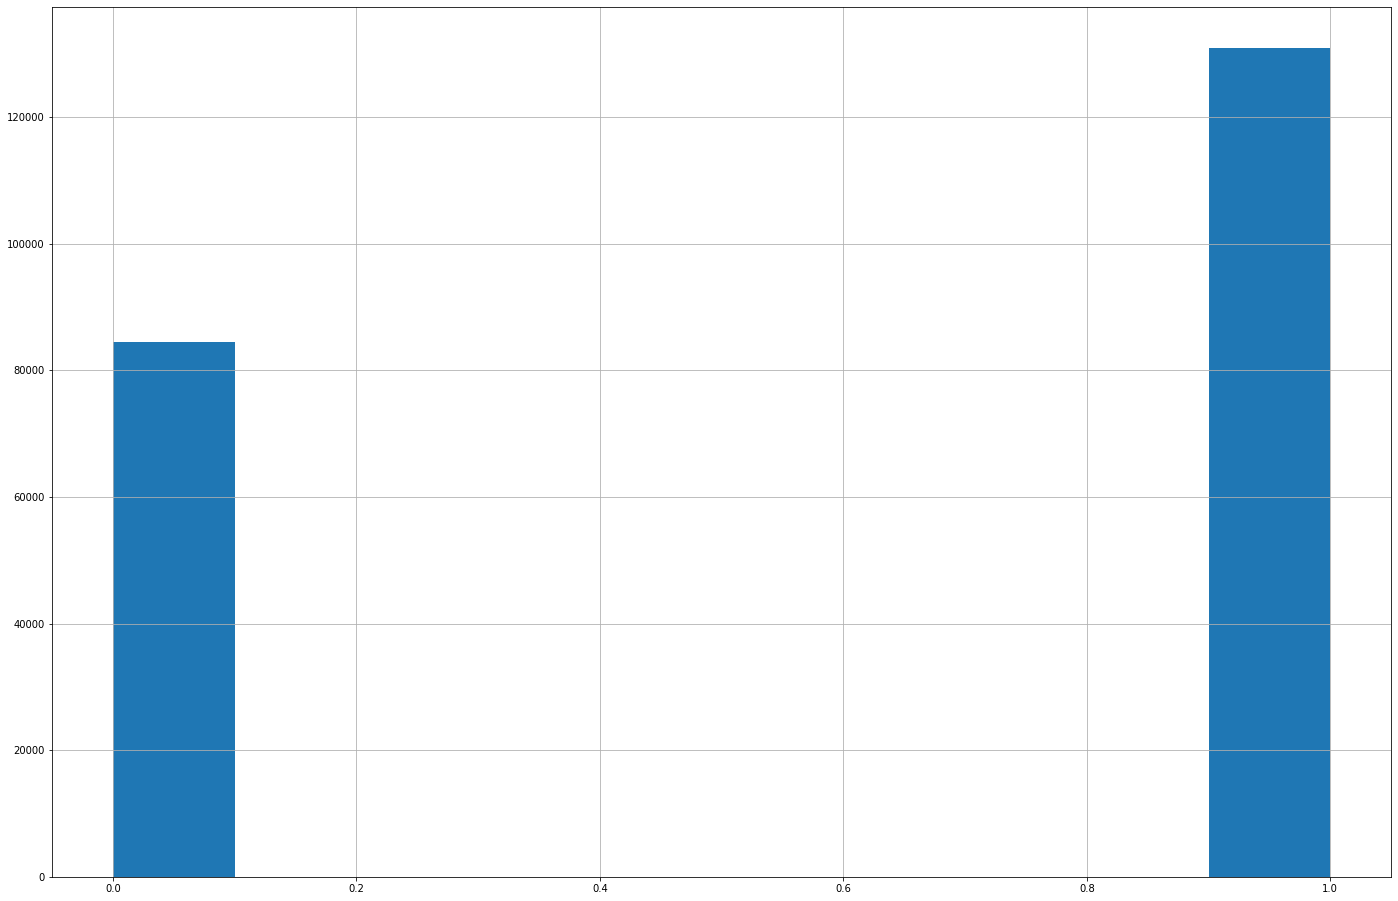

In [23]:
display(y_train_balanced.shape)
y_train_balanced.hist(figsize=(24, 16))

In [25]:
prediction_of_models = utils.get_predictions(MODELS, sets=[
    X_train_scaled_balanced, 
    X_test_scaled,
    y_train_balanced, 
    y_test])

results = utils.get_results(prediction_of_models, y_test)

results

C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,r2,mean_abs,mean_sqrd
model,,,
Logistic Regression,-2.108402,0.409542,0.639954
K Nearest Neighbors,-2.087234,0.406753,0.637772
Decision Tree Classifier,-1.261149,0.297914,0.545815
Random Forest Classifier,-1.064550,0.272011,0.521547


In [34]:
for prediction in prediction_of_models:
    print(prediction[0])
    print(classification_report(y_test, prediction[1]))
    print(confusion_matrix(y_test, prediction[1]))
    TP = confusion_matrix(y_test, prediction[1])[0][0]
    FP = confusion_matrix(y_test, prediction[1])[0][1]
    TN = confusion_matrix(y_test, prediction[1])[1][1]
    FN = confusion_matrix(y_test, prediction[1])[1][0]
    lst_str = ["TP", "FP", "FN", "TN"]
    for val in VALUES:
        display(val)

Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.54      0.69     48412
           1       0.26      0.84      0.39      8957

    accuracy                           0.59     57369
   macro avg       0.60      0.69      0.54     57369
weighted avg       0.84      0.59      0.64     57369

[[26308 22104]
 [ 1391  7566]]


26308

22104

1391

7566

K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.93      0.56      0.70     48412
           1       0.25      0.78      0.38      8957

    accuracy                           0.59     57369
   macro avg       0.59      0.67      0.54     57369
weighted avg       0.83      0.59      0.65     57369

[[27023 21389]
 [ 1946  7011]]


27023

21389

1946

7011

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.72      0.80     48412
           1       0.29      0.62      0.39      8957

    accuracy                           0.70     57369
   macro avg       0.60      0.67      0.60     57369
weighted avg       0.81      0.70      0.74     57369

[[34741 13671]
 [ 3420  5537]]


34741

13671

3420

5537

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.93      0.74      0.82     48412
           1       0.32      0.68      0.44      8957

    accuracy                           0.73     57369
   macro avg       0.62      0.71      0.63     57369
weighted avg       0.83      0.73      0.76     57369

[[35698 12714]
 [ 2891  6066]]


35698

12714

2891

6066